In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('/content/car_age_price.csv')

In [3]:
df.head(10)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
9,2017,575000


In [4]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


<Axes: xlabel='Year', ylabel='Price'>

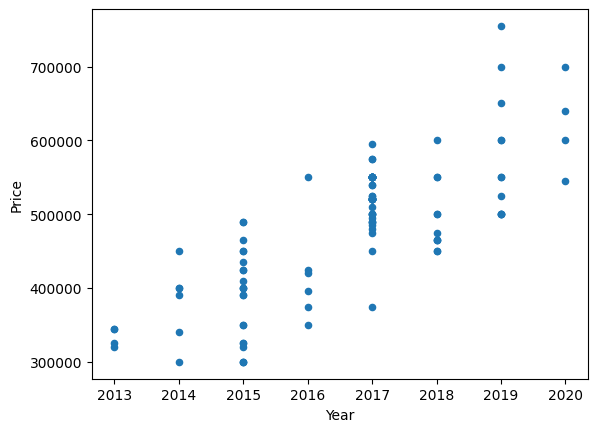

In [5]:
df.plot.scatter(x='Year', y='Price')

In [6]:
df.columns

Index(['Year', 'Price'], dtype='object')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
 X = df[['Year']]
 y = df['Price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_test.shape

(23, 1)

# LinearRegression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

In [12]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [13]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression Mean Squared Error: {mse_linear}')

Linear Regression Mean Squared Error: 4326906256.829671


In [14]:
accuracy_linear = linear_model.score(X_test, y_test)
print(accuracy_linear)

0.36759313425902185


# Lasso Regression

In [15]:
from sklearn.linear_model import Lasso

In [16]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [17]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression Mean Squared Error: {mse_lasso}')

Lasso Regression Mean Squared Error: 4326901608.19506


In [18]:
accuracy_lasso = lasso_model.score(X_test, y_test)
print(accuracy_lasso)

0.36759381368868127


In [19]:
#Predict the price using the linear regression model
linear_price_2022 = linear_model.predict([[2022]])
print(f'Predicted Price (Linear Regression) for 2022: {linear_price_2022[0]}')

Predicted Price (Linear Regression) for 2022: 743601.6159450412


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
# Predict the price using the Lasso regression model
lasso_price_2022 = lasso_model.predict([[2022]])
print(f'Predicted Price (Lasso Regression) for 2022: {lasso_price_2022[0]}')

Predicted Price (Lasso Regression) for 2022: 743601.3917776793


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [21]:
# Compare Mean Squared Error of both models
print(f'Linear Regression Mean Squared Error: {mse_linear}')
print(f'Lasso Regression Mean Squared Error: {mse_lasso}')

Linear Regression Mean Squared Error: 4326906256.829671
Lasso Regression Mean Squared Error: 4326901608.19506
